In [119]:
from itertools import combinations
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import IESDS
import order_k
import BFPSNS
import Linear_programming
import support_enumeration as se

In [120]:
win = pd.read_csv('winrates1.csv', index_col=0)
playrates = pd.read_csv ('playrates1.csv', index_col=0)
deck = playrates.index.values # liste af navne på deck
U = win.values # konverteret til numpy
dat = pd.DataFrame(U, index=deck, columns=deck)


## Opgave 2:

##### 2.1 Find strategien for en k’te ordens rationel spiller for k = 1, ..., 10. Er der noget mønster?

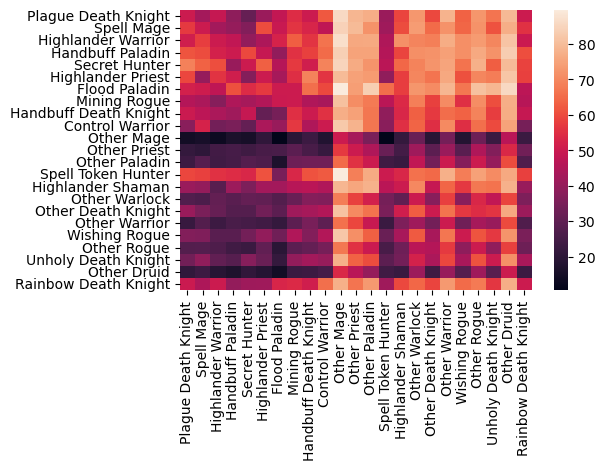

In [121]:
rows = dat.index
cols = dat.columns
decks = rows
sns.heatmap(dat, xticklabels=cols, yticklabels=rows); 
plt.tight_layout(); 

In [122]:
U1 = dat.values # numpy array 
U2 = -dat.values

In [123]:
U1 = dat.values
U2 = -U1

for i in range(11):
    if i > 0:
        print(f"{i}th order rational player plays: {decks[order_k.order_k_rationality(U1, U2, i) > 0][0]}")

1th order rational player plays: Flood Paladin
2th order rational player plays: Rainbow Death Knight
3th order rational player plays: Handbuff Paladin
4th order rational player plays: Flood Paladin
5th order rational player plays: Rainbow Death Knight
6th order rational player plays: Handbuff Paladin
7th order rational player plays: Flood Paladin
8th order rational player plays: Rainbow Death Knight
9th order rational player plays: Handbuff Paladin
10th order rational player plays: Flood Paladin


### 2.

In [124]:
U1 = dat.values
U2 = -dat.values

playrates_values = playrates.copy()

playrates_values= playrates_values.values

expected_payoffs = U1 @ playrates_values[:, 0]
max_index = np.argmax(expected_payoffs)
print(decks[max_index])
print(f"Winrate: {expected_payoffs[max_index]}")

Secret Hunter
Winrate: 62.67244998000246


### 3.

In [125]:
mixed_res = Linear_programming.solve_by_LP(U1)
print(f'Mixed strategies: {mixed_res}')

Mixed strategies: [0.         0.         0.         0.         0.1944561  0.
 0.54597026 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.25957364]


### 4.

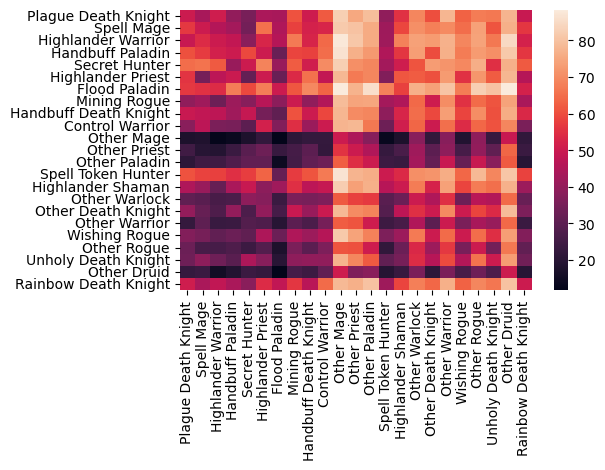

In [126]:
win_2 = pd.read_csv('winrates2.csv', index_col=0)
playrates_2 = pd.read_csv ('playrates2.csv', index_col=0)
deck_2 = playrates_2.index.values # liste af navne på deck
U_2 = win_2.values # konverteret til numpy
dat_2 = pd.DataFrame(U_2, index=deck, columns=deck)

rows = dat_2.index
cols = dat_2.columns
decks = rows

sns.heatmap(dat_2, xticklabels=cols, yticklabels=rows); 
plt.tight_layout(); 

In [127]:
U1 = dat_2.values
U2 = -U1

for i in range(11):
    if i > 0:
        print(f"{i}th order rational player plays: {decks[order_k.order_k_rationality(U1, U2, i) > 0][0]}")

1th order rational player plays: Flood Paladin
2th order rational player plays: Flood Paladin
3th order rational player plays: Flood Paladin
4th order rational player plays: Flood Paladin
5th order rational player plays: Flood Paladin
6th order rational player plays: Flood Paladin
7th order rational player plays: Flood Paladin
8th order rational player plays: Flood Paladin
9th order rational player plays: Flood Paladin
10th order rational player plays: Flood Paladin


In [128]:
U1 = dat_2.values
U2 = -dat_2.values

playrates_values = playrates_2.copy()

playrates_values= playrates_values.values

expected_payoffs = U1 @ playrates_values[:, 0]
max_index = np.argmax(expected_payoffs)
print(decks[max_index])
print(f"Winrate: {expected_payoffs[max_index]}")

Flood Paladin
Winrate: 65.66674734840339


In [129]:
mixed_res = Linear_programming.solve_by_LP(U1)
print(f'Mixed strategies: {mixed_res}')

Mixed strategies: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 5.

In [130]:
# (Anacondra druid, Control Warrior)
# Winrate 54.47%

d1 = ['Mech Mage', 'Control Warrior'] # Arne
d2 = ['Naga Demon Hunter', 'Quest Hunter'] # Birger - Lucas
win_sub = win.loc[d1, d2] # 2*2 dataframe
U = win_sub.values # numpy

#Find all 2 combinations of an array
def find_combinations(deck, r):
    return list(combinations(deck, r))

kombinationer = find_combinations(decks, 2)

max_v = 0

for i in kombinationer:
    d1 = i
    d2 = ['Naga Demon Hunter', 'Quest Hunter'] 
    win_sub = win.loc[d1, d2] # 2*2 dataframe
    U1 = win_sub.values # numpy
    U2 = -U1
    NE = se.msne(U1,U2)
    sigma1 = NE[0][0]
    sigma2 = NE[0][1].T
    #forventet nytte:
    v1 = sigma1 @ U1 @ sigma2
    print(v1)
    if v1 > max_v:
        max_v = v1
        best_deck = i
print(f"Best decks: {best_deck} with expected value {max_v}")
    


KeyError: "['Mech Mage'] not in index"